In [26]:
import torch
model = torch.hub.load('pytorch/vision:v0.6.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()
from numpy import asarray
import urllib
from PIL import Image
from torchvision import transforms
import cv2
import numpy as np

Using cache found in /Users/aleksandrsimonyan/.cache/torch/hub/pytorch_vision_v0.6.0


# Detection of a Car Based On Semantic Segmentation

In [6]:

input_image = Image.open('audi_croped.jpg')
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])



In [41]:
audi = cv2.imread('audi_croped.jpg')

In [7]:
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

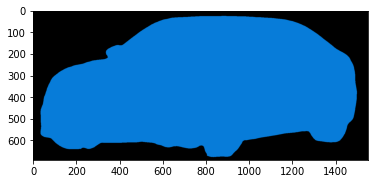

In [8]:
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)

In [13]:
audio =  cv2.imread('audi_croped.jpg')


In [21]:
pil =  r.convert('RGB') 

# Matching the contours of the segmented part with the original image

In [27]:
open_cv_image = np.array(pil) 

In [28]:
open_cv_image = open_cv_image[:, :, ::-1].copy() 

In [33]:
imgray = cv2.cvtColor(open_cv_image, cv2.COLOR_BGR2GRAY)


In [34]:
ret, thresh = cv2.threshold(imgray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)



In [35]:
cv2.drawContours(imgray, contours, -1, (0, 255, 0), 3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

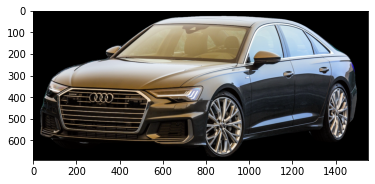

In [42]:
stencil = np.zeros(audi.shape).astype(audi.dtype)
color = [255,255,255]
cv2.fillPoly(stencil, contours, color)
result = cv2.bitwise_and(audi, stencil)
plt.imshow(result)